Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_houses = pd.read_csv("AB_NYC_2019.csv")

In [3]:
neighbourhood = pd.read_csv("neighbourhood.csv")

In [4]:
neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   48895 non-null  int64 
 1   neighbourhood_group  48895 non-null  object
dtypes: int64(1), object(1)
memory usage: 764.1+ KB


In [5]:
neighbourhood

,id,neighbourhood_group
0,36442252,Bronx
1,36435986,Bronx
2,36429652,Bronx
3,36428186,Bronx
4,36426093,Bronx
...,...,...
48890,63320,Staten Island
48891,62787,Staten Island
48892,62461,Staten Island
48893,62452,Staten Island


In [6]:
all_houses["neighbourhood_group"] = all_houses.merge(neighbourhood, on="id")["neighbourhood_group"]

In [7]:
all_houses

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,Brooklyn
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,Manhattan
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Manhattan
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,Brooklyn
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,Brooklyn
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,Brooklyn
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,Manhattan
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,Manhattan


In [8]:
print(all_houses.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group'],
      dtype='object')


In [9]:
all_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

Data Cleaning

In [10]:
all_houses.drop(columns=['name', 'host_name', 'host_id', 'last_review'], inplace=True)

In [11]:
all_houses['id'].is_unique

True

In [12]:
all_houses.isna().sum()

id                                    0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group                   0
dtype: int64

In [13]:
all_houses = all_houses.fillna(0)

Data Exploration

Cost of Properties

In [16]:
houses_0_50 = all_houses[all_houses['price'] <= 50 ]
houses_51_100 = all_houses[(all_houses['price'] > 50) & (all_houses['price'] <= 100 )].sort_values('price')
houses_101_150 = all_houses[(all_houses['price'] > 100) & (all_houses['price'] <= 150)].sort_values('price')
houses_151_200 = all_houses[(all_houses['price'] > 151) & (all_houses['price'] <= 200)].sort_values('price')
houses_201_250 = all_houses[(all_houses['price'] > 200) & (all_houses['price'] <= 250)].sort_values('price')
houses_251_300 = all_houses[(all_houses['price'] > 251) & (all_houses['price'] <= 300)].sort_values('price')
houses_301 = all_houses[(all_houses['price'] > 300)].sort_values('price')

In [17]:
houses_0_50

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group
28,9518,Inwood,40.86482,-73.92106,Private room,44,3,108,1.11,3,311,Manhattan
30,9668,Harlem,40.82245,-73.95104,Private room,50,3,242,2.04,3,355,Manhattan
33,9783,Harlem,40.82130,-73.95318,Private room,50,3,273,2.37,3,359,Manhattan
36,11452,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.00,1,365,Brooklyn
39,12048,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,1.81,4,188,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36477588,East Harlem,40.79760,-73.93947,Private room,50,7,0,0.00,1,22,Manhattan
48877,36479230,Bushwick,40.70418,-73.91471,Private room,42,7,0,0.00,1,16,Brooklyn
48878,36479723,Elmhurst,40.74477,-73.87727,Private room,45,1,0,0.00,5,172,Queens
48882,36482231,Bushwick,40.69652,-73.91079,Private room,40,20,0,0.00,1,31,Brooklyn


In [22]:
grouped_0_50 = houses_0_50.groupby(["room_type"]).count().sort_values("price")
grouped_51_100 = houses_51_100.groupby(["room_type"]).count().sort_values("price")
grouped_101_150 = houses_101_150.groupby(["room_type"]).count().sort_values("price")
grouped_151_200 = houses_151_200.groupby(["room_type"]).count().sort_values("price")
grouped_201_250 = houses_201_250.groupby(["room_type"]).count().sort_values("price")
grouped_251_300 = houses_251_300.groupby(["room_type"]).count().sort_values("price")
grouped_301 = houses_301.groupby(["room_type"]).count().sort_values("price")

In [23]:
grouped_0_50.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)
grouped_51_100.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)
grouped_101_150.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)
grouped_151_200.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)
grouped_201_250.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)
grouped_251_300.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)
grouped_301.drop(columns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group'], inplace=True)

In [24]:
grouped_0_50.columns = ["0-50"]
grouped_51_100.columns = ["51-100"]
grouped_101_150.columns = ["101-150"]
grouped_151_200.columns = ["151-200"]
grouped_201_250.columns = ["201-250"]
grouped_251_300.columns = ["251-300"]
grouped_301.columns = ["301 and abv"]

In [25]:
grouped_301

,301 and abv
room_type,
Shared room,23
Private room,354
Entire home/apt,2980


In [26]:
overall_data = pd.concat([grouped_0_50, grouped_51_100, grouped_101_150, grouped_151_200, grouped_201_250, grouped_251_300, grouped_301], axis=1)

Text(0.5, 0, 'Type of Rooms')

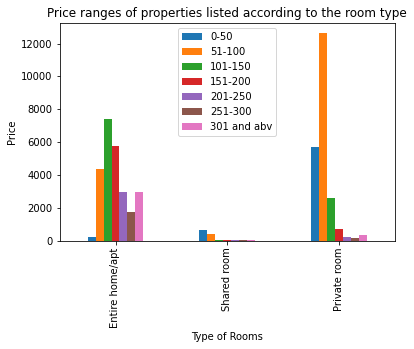

In [101]:
overall_data.plot.bar()
plt.title("Price ranges of properties listed according to the room type")
plt.ylabel("Price")
plt.xlabel("Type of Rooms")

In [28]:
houses_brooklyn = all_houses[all_houses['neighbourhood_group'] == 'Brooklyn']
houses_manhattan = all_houses[all_houses['neighbourhood_group'] == 'Manhattan']
houses_queens = all_houses[all_houses['neighbourhood_group'] == 'Queens']
houses_staten = all_houses[all_houses['neighbourhood_group'] == 'Staten Island']
houses_bronx = all_houses[all_houses['neighbourhood_group'] == 'Bronx']

In [29]:
average_price_neighbourhood = pd.DataFrame({
    "Neighbourhood Group": ['Brooklyn', 'Manhattan', 'Queens', 'Staten', 'Bronx'],
    "Average Price": [
                      houses_brooklyn['price'].mean(),
                      houses_manhattan['price'].mean(),
                      houses_queens['price'].mean(),
                      houses_staten['price'].mean(),
                      houses_bronx['price'].mean(),
    ]
})

In [89]:
average_price_neighbourhood.set_index('Neighbourhood Group', inplace=True)

Text(0.5, 1.0, 'Average price of properties listed according to the neighbourhood group')

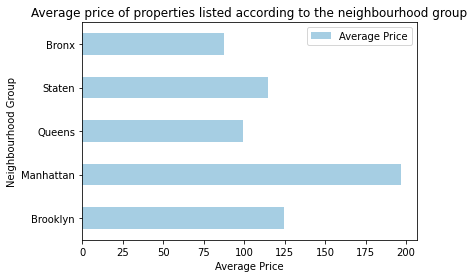

In [102]:
average_price_neighbourhood.plot.barh(colormap='Paired')
plt.xlabel("Average Price")
plt.title("Average price of properties listed according to the neighbourhood group")

In [30]:
average_price_neighbourhood

,Neighbourhood Group,Average Price
0,Brooklyn,124.383207
1,Manhattan,196.875814
2,Queens,99.517649
3,Staten,114.812332
4,Bronx,87.496792


In [31]:
ent_home_host = all_houses[all_houses['room_type'] == 'Entire home/apt']
shared_host = all_houses[all_houses['room_type'] == 'Shared room']
private_host = all_houses[all_houses['room_type'] == 'Private room']

In [32]:
average_spent_room_type = pd.DataFrame({
    "Room Type": ['Entire Home', 'Shared Room', 'Private Room'],
    "Average Price": [
                      ent_home_host['price'].mean(),
                      shared_host['price'].mean(),
                      private_host['price'].mean()
    ]
})

In [33]:
average_spent_room_type

,Room Type,Average Price
0,Entire Home,211.794246
1,Shared Room,70.127586
2,Private Room,89.780973


In [95]:
average_spent_room_type.set_index('Room Type', inplace=True)

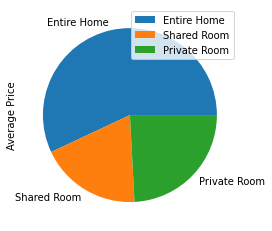

In [98]:
average_spent_room_type.plot.pie(y='Average Price')

In [34]:
grouped_brooklyn = houses_brooklyn.groupby(['room_type']).mean()
grouped_manhattan = houses_manhattan.groupby(['room_type']).mean()
grouped_queens = houses_queens.groupby(['room_type']).mean()
grouped_staten = houses_staten.groupby(['room_type']).mean()
grouped_bronx = houses_bronx.groupby(['room_type']).mean()

In [35]:
grouped_brooklyn.drop(columns=['id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], inplace=True)
grouped_manhattan.drop(columns=['id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], inplace=True)
grouped_queens.drop(columns=['id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], inplace=True)
grouped_staten.drop(columns=['id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], inplace=True)
grouped_bronx.drop(columns=['id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], inplace=True)

In [36]:
grouped_brooklyn.columns = ['Brooklyn']
grouped_queens.columns = ['Queens']
grouped_manhattan.columns = ['Manhattan']
grouped_staten.columns = ['Staten']
grouped_bronx.columns = ['Bronx']

In [37]:
grouped_brooklyn

,Brooklyn
room_type,
Entire home/apt,178.327545
Private room,76.500099
Shared room,50.527845


In [38]:
overall_avg = pd.concat([grouped_brooklyn, grouped_manhattan, grouped_queens, grouped_staten, grouped_bronx], axis=1)

In [39]:
overall_avg

,Brooklyn,Manhattan,Queens,Staten,Bronx
room_type,,,,,
Entire home/apt,178.327545,249.239109,147.050573,173.846591,127.506596
Private room,76.500099,116.776622,71.762456,62.292553,66.788344
Shared room,50.527845,88.977083,69.020202,57.444444,59.800000


Text(0.5, 0, 'Average Price')

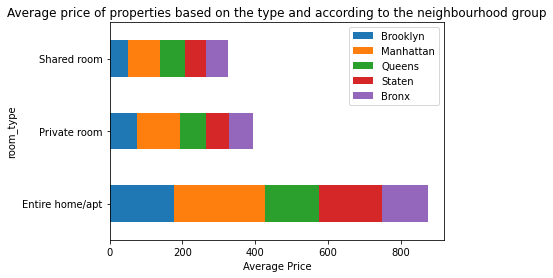

In [103]:
overall_avg.plot.barh(stacked=True)
plt.title("Average price of properties based on the type and according to the neighbourhood group")
plt.xlabel('Average Price')

In [40]:
ent_home_host.drop(columns=['latitude', 'longitude', 'reviews_per_month', 'availability_365', 'room_type', 'id'], inplace=True)
shared_host.drop(columns=['latitude', 'longitude', 'reviews_per_month', 'availability_365', 'room_type', 'id'], inplace=True)
private_host.drop(columns=['latitude', 'longitude', 'reviews_per_month', 'availability_365', 'room_type', 'id'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Type of Rooms

In [105]:
ent_sum = ent_home_host['calculated_host_listings_count'].sum()
shared_sum = shared_host['calculated_host_listings_count'].sum()
private_sum = private_host['calculated_host_listings_count'].sum()

In [106]:
total_host = pd.DataFrame({
    'Room Types': ['Entire Apt', 'Shared Room', 'Private Room'],
    'Number of Stays': [ent_sum, shared_sum, private_sum],
    'Minimum Nights': [
                       ent_home_host['minimum_nights'].mean(),
                       shared_host['minimum_nights'].mean(),
                       private_host['minimum_nights'].mean()
    ]
})

In [107]:
total_host

,Room Types,Number of Stays,Minimum Nights
0,Entire Apt,271834,8.506907
1,Shared Room,5409,6.475000
2,Private Room,72062,5.377900


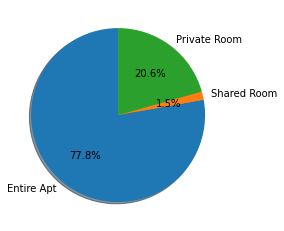

In [108]:
fig1, ax1 = plt.subplots()
ax1.pie(total_host['Number of Stays'], labels=total_host['Room Types'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

Neighbourhood Characteristics

In [147]:
ent_home_host['calculated_host_listings_count'].value_counts()

1      18996
2       2530
3        815
4        365
327      319
232      232
5        214
96       191
8        135
6        130
121      121
52       104
49        98
91        91
7         91
87        87
33        80
12        76
9         75
65        65
31        62
50        49
13        48
23        46
39        39
10        33
11        32
34        31
14        31
15        31
29        29
25        25
21        21
20        20
19        19
18        18
28        17
17        17
16        16
26         5
103        2
47         2
27         1
Name: calculated_host_listings_count, dtype: int64

In [148]:
ent_home_host['minimum_nights'].value_counts()

2      6236
3      4728
1      4227
30     2651
4      2122
       ... 
198       1
122       1
43        1
186       1
175       1
Name: minimum_nights, Length: 91, dtype: int64

In [42]:
top_ent_home_host = ent_home_host[(ent_home_host['calculated_host_listings_count'] >= 10) & (ent_home_host['minimum_nights'] >= 14)]

In [109]:
top_10_neighbourhoods = top_ent_home_host['neighbourhood'].head(10)

Number of reviews

In [77]:
highly_reviewed_properties = all_houses[all_houses['number_of_reviews']>50]

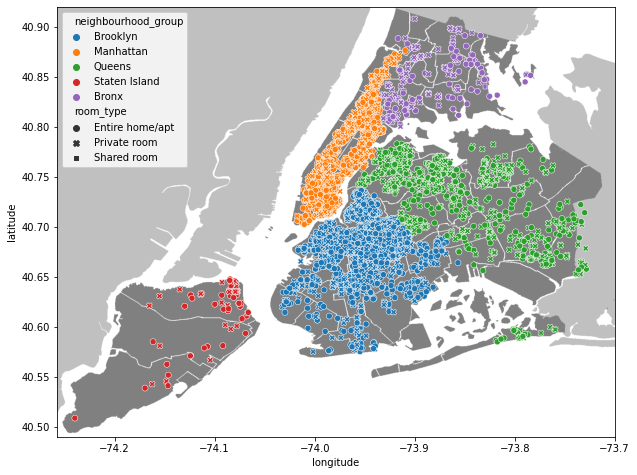

In [78]:
import matplotlib.image as mpimg 
map_img = mpimg.imread('Map.png') 
plt.figure(figsize=(10,8))
plt.imshow(map_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sns.scatterplot(ax=ax,data=highly_reviewed_properties, x="longitude", y="latitude", hue="neighbourhood_group", style="room_type", zorder=5)
plt.show()



Location of the listed properties

In [69]:
len(all_houses['neighbourhood'].unique())

221

In [76]:
all_houses['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [84]:
all_houses[all_houses['neighbourhood_group'] == 'Bronx'].count()

id                                1091
neighbourhood                     1091
latitude                          1091
longitude                         1091
room_type                         1091
price                             1091
minimum_nights                    1091
number_of_reviews                 1091
reviews_per_month                  876
calculated_host_listings_count    1091
availability_365                  1091
neighbourhood_group               1091
dtype: int64

Text(0, 0.5, 'Number of Properties')

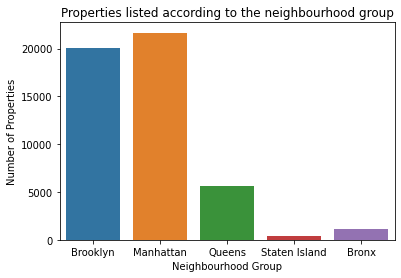

In [99]:
sns.countplot(x="neighbourhood_group", data=all_houses)
plt.title("Properties listed according to the neighbourhood group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Properties")

Text(0, 0.5, 'Number of Properties')

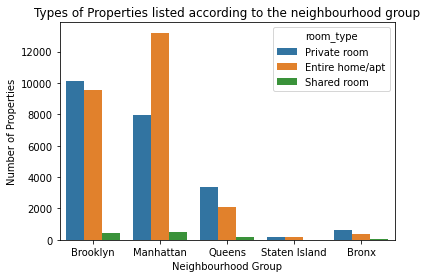

In [100]:
sns.countplot(x="neighbourhood_group", hue="room_type", data=all_houses)
plt.title("Types of Properties listed according to the neighbourhood group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Properties")